<a href="https://colab.research.google.com/github/Praneesh-Sharma/Celebal-Summer-Internship/blob/main/Assignment_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSI Assignment Week_4

Autor- Praneesh Sharma

## Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

## Importing the Dataset

In [20]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling Missing Values

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# Fill missing values in the 'Age' column with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Handling Categorical Variables

In [30]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


### Handling Outliers

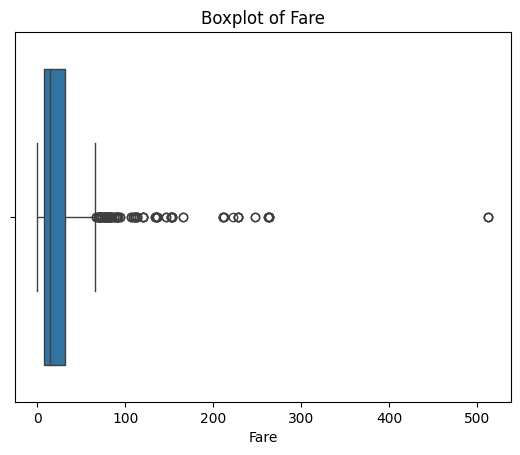

In [31]:
# Boxplot to identify outliers in the 'Fare' column
sns.boxplot(data=df, x='Fare')
plt.title('Boxplot of Fare')
plt.show()

In [32]:
# Removing outliers from the 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

In [34]:
df.shape

(775, 12)

### Scaling and Normalization

In [35]:
# Scale numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.528321,1,0,A/5 21171,-0.779117,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",-0.215182,0,0,STON/O2. 3101282,-0.729373,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.489381,1,0,113803,2.599828,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.489381,0,0,373450,-0.720161,True,False,True
5,6,0,3,"Moran, Mr. James",-0.058613,0,0,330877,-0.690071,True,True,False


### New Feature Creation

In [37]:
# Create a new feature 'FamilySize' from 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature 'IsAlone' indicating whether the passenger was alone
df['IsAlone'] = 1
df['IsAlone'].loc[df['FamilySize'] > 1] = 0

<ipython-input-37-48a8c2b2df46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0


In [38]:
# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,-0.528321,-0.779117,True,False,True,2,0
2,3,1,3,-0.215182,-0.729373,False,False,True,1,1
3,4,1,1,0.489381,2.599828,False,False,True,2,0
4,5,0,3,0.489381,-0.720161,True,False,True,1,1
5,6,0,3,-0.058613,-0.690071,True,True,False,1,1


### Feature Selection

In [40]:
# Select features and target variable
X = df.drop(columns=['PassengerId', 'Survived'])
y = df['Survived']

In [41]:
# Use PCA for dimensionality reduction (optional)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Display the explained variance ratio of the components
print(pca.explained_variance_ratio_)

[0.48436823 0.26152111 0.11575907 0.04659264 0.03763149]
